In [58]:
#Libraries
import pandas as pd
import numpy as np
import math
import datetime as dt
import os
import re
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sea
%notebook matplotlib
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Databases:
- https://ourworldindata.org/income-inequality
- https://ourworldindata.org/homicides#homicide-rates-by-age
- https://data.worldbank.org/indicator/SI.POV.GINI

## Correlation Beetween Global Inequality and Homicides

### Preparing the data to analyze

In [59]:
#Homicides rate by age (death per 100,000 individuals)
#source: https://ourworldindata.org/homicides#homicide-rates-by-age
df_h = pd.read_csv('homicide-rate-by-age.csv')
year = 2017
df_h_17 = df_h[df_h.Year == year]
df_h_17

,Entity,Code,Year,Deaths - Interpersonal violence - Sex: Both - Age: 50-69 years (Rate),Deaths - Interpersonal violence - Sex: Both - Age: 15-49 years (Rate),Deaths - Interpersonal violence - Sex: Both - Age: 70+ years (Rate),Deaths - Interpersonal violence - Sex: Both - Age: 5-14 years (Rate),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Rate),Deaths - Interpersonal violence - Sex: Both - Age: Under 5 (Rate)
27,Afghanistan,AFG,2017,8.736137,19.780298,4.130845,1.331031,10.673076,2.637326
55,Albania,ALB,2017,2.121149,3.407907,2.495100,0.446057,2.488883,0.717850
83,Algeria,DZA,2017,0.756421,1.635803,0.620499,0.225109,1.084101,0.218541
111,American Samoa,ASM,2017,6.383407,7.408976,6.993391,0.909403,5.215552,1.362638
139,Andean Latin America,NaN,2017,7.058676,10.151138,5.482188,1.038812,6.814225,1.278010
...,...,...,...,...,...,...,...,...,...
6355,Western Sub-Saharan Africa,NaN,2017,7.458930,6.004983,7.342124,0.811773,4.328658,3.782838
6383,World,OWID_WRL,2017,4.734823,7.789716,3.603635,0.834760,5.305255,1.735777
6411,Yemen,YEM,2017,2.785784,4.854016,1.954308,0.558551,2.850101,0.773233
6439,Zambia,ZMB,2017,6.655945,9.583065,4.461633,0.825031,5.721784,2.304451


In [60]:
#I'll pick up the Gini index in 2016 because I'll have more data available to explore.
year = 2016
df_ine = pd.read_excel('API_SI.POV.GINI_DS2_en_csv_v2_2252167//API_SI.POV.GINI_DS2_en_csv_v2_2252167.xlsx', header= 4 )
df_ine = df_ine.loc[:,['Country Name','Country Code',year]].dropna(axis = 0, subset = [year]).rename(columns = {year:'Gini Index'})
df_ine

,Country Name,Country Code,Gini Index
3,Albania,ALB,33.7
7,Argentina,ARG,42.0
8,Armenia,ARM,32.5
12,Austria,AUT,30.8
15,Belgium,BEL,27.6
...,...,...,...
246,Ukraine,UKR,25.0
248,Uruguay,URY,39.7
249,United States,USA,41.1
255,Vietnam,VNM,35.3


In [61]:
#Country codes
df_code = pd.read_csv('country_codes.txt', sep= ',')
df_code = df_code[df_code.columns[0::4]]
df_code.head()

,Continent_Name,Three_Letter_Country_Code
0,Asia,AFG
1,Europe,ALB
2,Antarctica,ATA
3,Africa,DZA
4,Oceania,ASM


In [62]:
#Merging dataframes
df = pd.merge(df_h_17,df_ine[['Country Code', 'Gini Index']], how = 'inner', left_on= 'Code', right_on= 'Country Code').merge(df_code, how = 'inner', left_on = 'Code', right_on = 'Three_Letter_Country_Code')
df.head()

,Entity,Code,Year,Deaths - Interpersonal violence - Sex: Both - Age: 50-69 years (Rate),Deaths - Interpersonal violence - Sex: Both - Age: 15-49 years (Rate),Deaths - Interpersonal violence - Sex: Both - Age: 70+ years (Rate),Deaths - Interpersonal violence - Sex: Both - Age: 5-14 years (Rate),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Rate),Deaths - Interpersonal violence - Sex: Both - Age: Under 5 (Rate),Country Code,Gini Index,Continent_Name,Three_Letter_Country_Code
0,Albania,ALB,2017,2.121149,3.407907,2.495100,0.446057,2.488883,0.717850,ALB,33.7,Europe,ALB
1,Argentina,ARG,2017,5.802285,8.860584,5.692801,0.777382,6.175149,1.053483,ARG,42.0,South America,ARG
2,Armenia,ARM,2017,4.679695,4.309527,5.536626,0.335932,3.691191,0.196100,ARM,32.5,Europe,ARM
3,Armenia,ARM,2017,4.679695,4.309527,5.536626,0.335932,3.691191,0.196100,ARM,32.5,Asia,ARM
4,Austria,AUT,2017,0.869204,0.778925,1.059871,0.219924,0.781110,0.659408,AUT,30.8,Europe,AUT


In [63]:
#Analysing the correlation between inequality and 15-49 year homicides rate  in 2017
df_crime = df[['Code','Entity','Continent_Name', 'Gini Index', 'Deaths - Interpersonal violence - Sex: Both - Age: 15-49 years (Rate)']].rename(
    columns = {'Deaths - Interpersonal violence - Sex: Both - Age: 15-49 years (Rate)':'Homicides Rate -15-49 years'})

#Formting data
#Converting the values to percentages  
df_crime['Homicides Rate -15-49 years'] = df_crime['Homicides Rate -15-49 years'] 
df_crime['Gini Index'] = df_crime['Gini Index'] * 0.01

# I'll consider only Canada and the US as countries from north america and the remind countreis I'would call LATAM countries
df_crime.replace(['North America','South America'], 'Latim America', inplace = True)
df_crime.loc[11,'Continent_Name'] = 'North America'
df_crime.loc[74,'Continent_Name'] = 'North America'
df_crime = df_crime.sort_values(by ='Gini Index', ascending = True )
df_crime

,Code,Entity,Continent_Name,Gini Index,Homicides Rate -15-49 years
70,SVN,Slovenia,Europe,0.248,0.977391
81,UKR,Ukraine,Europe,0.250,13.766337
69,SVK,Slovakia,Europe,0.252,2.413685
6,BLR,Belarus,Europe,0.253,7.216778
18,CZE,Czechia,Europe,0.254,1.214964
...,...,...,...,...,...
58,PAN,Panama,Latim America,0.504,26.633700
13,COL,Colombia,Latim America,0.506,49.803723
67,LCA,Saint Lucia,Latim America,0.512,27.988669
9,BRA,Brazil,Latim America,0.533,47.343884


### Correlation and regression analysis between homicides rate and inequality index

In [64]:
#Computing the correlation
corr_in_hm = df_crime['Gini Index'].corr(df_crime['Homicides Rate -15-49 years'])
print('Corr: ', corr_in_hm)

Corr:  0.5665552052190511


In [65]:
# Linear regression (Linear least squares)
#Using a first degree equation (f(x) = a + bx) to approximate
X = df_crime['Gini Index'].to_numpy()
Y = df_crime['Homicides Rate -15-49 years'].to_numpy()
linear_coef = np.polyfit(y = Y, x = X ,deg = 1)
a1,a0 = linear_coef
F = a0 + a1 *X
print('f(x) = {} + {}x'.format(a0,a1))

f(x) = -33.59933989851586 + 118.46201490852319x


#### Least Squares Error (Sum os Squared Errors - SSE)
$\Large SSE = \sum_{i=1}^n (y_i - f_{i})^2$
- Where $ y_i$ is the actual value for data point i
- $ f_i = f(x_i)$ is the value resulted by the model I choosed

In [66]:
print('SSE: ', np.sum((Y-F)**2))

SSE:  13465.432386640417


**Computing the Coeffcient of Determination (R squared value)**
$\Large R^2 = 1 - \frac{SSR}{SSE}$
- $SSR$ represents the sum of squares of the residual errors of the data model.

In [69]:
corr_matrix = np.corrcoef(Y,F)
R_sq = corr_matrix[0,1] **2
print('Coefficient of Determination: ', R_sq)

Coefficient of Determination:  0.32098480056080125


Let's try another function to fit the data: a polyomial of n degree
- $\Large G(x) = a_0 + a_1 x + a_2 x^2 +.. + a_n x^n$
- $\Large i = 0,1,2,..,n$
- $\Large G(x) \in  [1,x,x^2,...,x^n]$
$$\Large [ <G_{i},G_{j}>] \dot [a_0,a_1,...,a_n]^{T} = [<G_{i}Y>] \Rightarrow Aa = B \rightarrow a = A^{-1}B $$

In [49]:
#Applying ordinary least squares algorithm

m = 3 # number of matrix colum/row (mXm) - n+1 equations
A = np.zeros([m,m]) # Produt scalar matrix [<Gi,Gj>] mXm
B = np.zeros([m,1]) # Independent matrix [<Gj,Yi]> mx1

for i in range(m): # n + 1 degree equation
    for j in range(m):
        A[i][j] = np.sum((X**i)*(X**j))     
        
for i in range(m):
    B[i][0] = np.sum(Y*X**i)

#Linear System solution AX = B --> X = BA^-1
alpha = np.linalg.inv(A).dot(B)
a,b,c= alpha
G = 0
for i in range(len(alpha)):
    G += alpha[i]*X**i 

In [71]:
from numpy.polynomial.polynomial import Polynomial

#Sum of squared error
print('SSE: ', np.sum((Y-G)**2))

# R squared value
corr_matrix = np.corrcoef(Y,G)
R_sq = corr_matrix[0,1] **2
print('Coefficient of Determination: ', R_sq)

#showing coeficients
y = np.polyfit(X,Y,2)
p = np.poly1d(y)
Polynomial(p)

SSE:  11252.015698594972
Coefficient of Determination:  0.4325997514008763


Polynomial([ 843.95610987, -524.91963574,   84.26745178], domain=[-1,  1], window=[-1,  1])

In [72]:
#Moving Least Squares
def MLS(X,Y):
    n = len(X)
    "My approximation function g(x)= a0 + a1X + a2X^2,....,anX^n = {1,X,X^2,....,X^n}"
    G = {0: np.array([1]*len(X)), 1:X, 2: X**2}
    m = len(G)# number of matrix colum/row (mXm), m -1 degree in case of n degree polynomial function
    
    #Calculating matrix P
    P = np.zeros([n,3])
    for i in range(n):
        for k in range(m):
            P[i][k] = G[k][i]
    
    #Setting Moving least Squares function
    def MLS(x, P = P, n = n, X = X, Y = Y):
        p = np.array([[1], [x], [x**2]])
    
        "W(x) = diag(w0(x), w1(x),..., wn(x))"
        W = np.zeros([n,n])
        for i in range(n):
            W[i][i] = np.exp((-1*((x-X[i])**2)/np.std(X)**2)) #Gaussian Function
            #W[i][i] = (1/(np.sqrt(2)*np.std(X))) * np.exp((-1*((x-X[i])**2)/np.std(X)**2))
            #W[i][i] = 1
        
        "A(x) = P'W(x)P"
        A = np.transpose(P).dot(W).dot(P)
        A_inverse = np.linalg.inv(A)

        "B(x) = P'W(x)Y"
        B = np.transpose(P).dot(W).dot(Y)

        "Shape Function"
        "a(x) = (A(x)^-1)B(x)"
        "Phi(x) = p'(A(x)^-1)B(x)"
        Shape = np.transpose(p) @ (A_inverse @ B)
        return Shape 

    #Lopping over every point xi (n points)
    Shape = np.array([],float)
    for xi in X:
        yi = MLS(xi)
        Shape = np.append(Shape,yi)
        
        
    # Least Square method
    "Produt scalar matrix A =  [<Gi,Gj>] mXm"
    A = np.zeros([m,m]) 
    
    "Independent matrix B = [<Gj,Yi]> mx1"
    B = np.zeros([m,1]) 
    
    "Matrix A"
    for i in range(m):
        for j in range(m):
            A[i][j] = np.sum(G[i]*G[j])
            
    "Matrix B"   
    for i in range(m):
        B[i][0] = np.sum(Y*G[i])

    "Linear System solution AX = B --> X = BA^-1"
    alpha = np.linalg.inv(A).dot(B)
    a = alpha[0][0]
    b = alpha[1][0]
    c = alpha[2][0]

    #Generating values from the least squares function
    g= a+ b*X +c*X**2
    return (Shape,g)

MLS_function,LS_function = MLS(X,Y)

In [75]:
#Sum of squared error
print('SSE: ', np.sum((Y-G)**2))

# R squared value
corr_matrix = np.corrcoef(Y,MLS_function)
R_sq = corr_matrix[0,1] **2
print('Coefficient of Determination: ', R_sq)


SSE:  11252.015698594972
Coefficient of Determination:  0.4450070959317009


In [53]:
Xbra,Ybra = df_crime[df_crime.Code == 'BRA'].iloc[:,-2:].to_numpy().flatten()

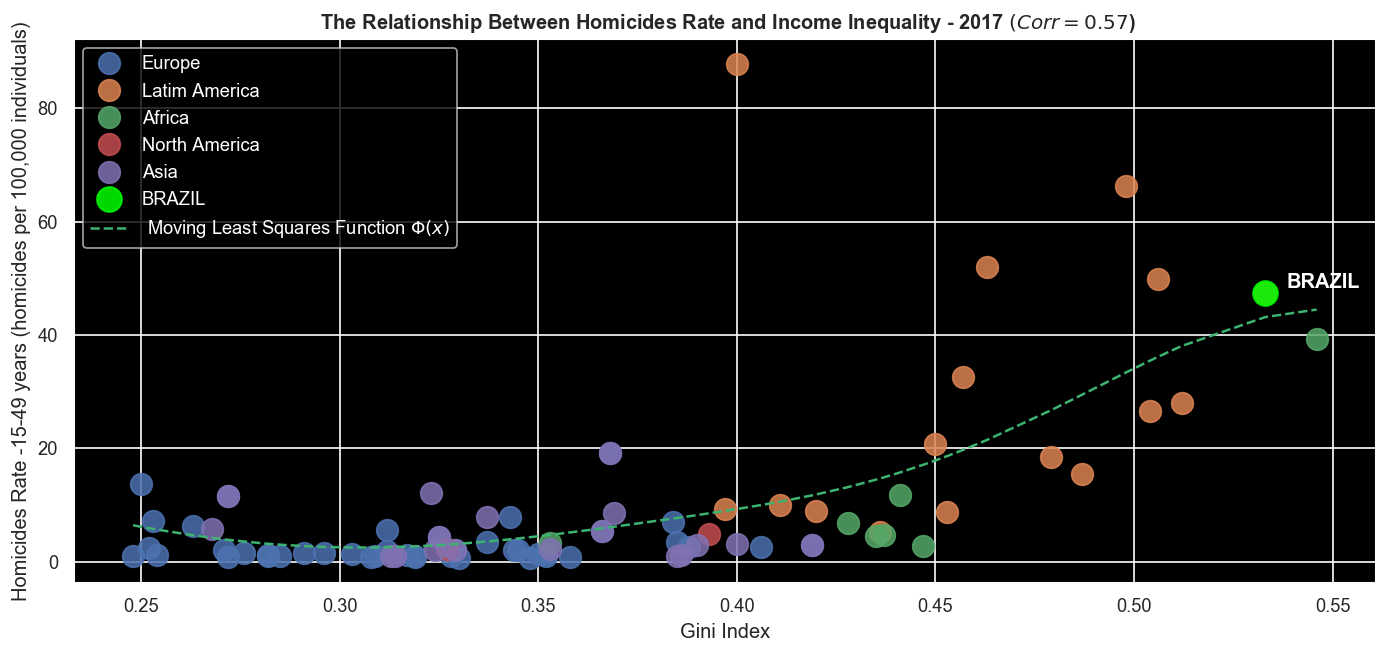

In [57]:
#Plotting---------------------------------------
plt.figure()
sea.set_style('darkgrid', {'axis.grid': True})
sea.set(rc = {'axes.facecolor':'black'} )

#Scatter
#Continents
continents = list(set(df_crime['Continent_Name'].to_list()))
for continent in continents:
    Yi = df_crime[df_crime['Continent_Name']== continent]['Homicides Rate -15-49 years'].to_list()
    Xi = df_crime[df_crime['Continent_Name']== continent]['Gini Index'].to_list()
    plt.plot(Xi,Yi,'o', linewidth = 2.4, markersize = 13, alpha = 0.85, label = continent)
    
#Brazil
Xbra,Ybra = df_crime[df_crime.Code == 'BRA'].iloc[:,-2:].to_numpy().flatten()
plt.plot(Xbra,Ybra,'o', linewidth = 2.4, color = 'lime', markersize = 15, alpha = 0.85, label = 'BRAZIL')

#Labels
plt.xlabel('Gini Index')
plt.ylabel('Homicides Rate -15-49 years (homicides per 100,000 individuals)')
plt.title(' The Relationship Between Homicides Rate and Income Inequality - {} $(Corr = {}$)'.format(year,round(corr_in_hm,2)), fontweight = 'bold')

##Linear Fit
#plt.plot(X,G,'--', linewidth = 1, c= 'crimson', label = '$y = {} + {}x + {}x^2$'.format(round(a[0],2),round(b[0],2),round(c[0],2)))
#plt.plot(X, F,'--', linewidth = 1, c= 'midnightblue', label = '$y = {} + {}x$'.format(round(a0,2),round(a1,2)))
plt.plot(X, MLS_function,'--', linewidth = 1.5, c= 'mediumseagreen', label =  ' Moving Least Squares Function $\Phi (x)$')

#Legend
leg = plt.legend(loc = 'best', shadow = False, frameon = True, framealpha = 0.8)
plt.text(Xbra*1.01,Ybra*1.02,'BRAZIL', fontweight = 'bold', color = 'white')
plt.setp(leg.get_texts(), color = 'white')

#Settings
plt.gcf().set_dpi(120)
plt.gcf().set_size_inches(14,6)

### That's why I'm not blown away by the fact that  14 cities in Brazil are among the 50 most violent cities in the World (2018)
- Source: https://www.businessinsider.com/most-violent-cities-in-the-world-in-2018-2019-3